In [153]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.lines as mlines
from matplotlib import rc, rcParams
import matplotlib.gridspec as gridspec
import os
import tempfile 
GeV = 1e9

In [155]:



fsize = 11
std_figsize = (1.2 * 3.7, 1.6 * 2.3617)
std_axes_form = [0.16, 0.15, 0.81, 0.76]

# standard figure
def std_fig(ax_form=std_axes_form, figsize=std_figsize, rasterized=False):

    rcparams = {
        "axes.labelsize": fsize,
        "xtick.labelsize": fsize,
        "ytick.labelsize": fsize,
        "figure.figsize": std_figsize,
        "legend.frameon": False,
        "legend.loc": "best",
    }
    plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"
    rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
    rc("text", usetex=True)
    rcParams.update(rcparams)
    rcParams["hatch.linewidth"] = 0.3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes(ax_form, rasterized=rasterized)
    ax.patch.set_alpha(0.0)

    return fig, ax

def read_data(textfile):
    energies, *data = np.loadtxt(textfile, unpack=True)
    data = np.array(data).T
    return energies, data

def read_cos_energy_data(cz_index, textfile):
    with open(textfile, 'r') as file:
        blocks = file.read().strip().split('\n\n')

    if cz_index >= len(blocks) or cz_index < 0:
        raise ValueError("cz_index out of range")

    # Extracting the first column (constant value) from the first line of the block
    coszen = float(blocks[cz_index].strip().split('\n')[0].split()[0])

    # Create a temporary file to store the selected block of data without the first column
    temp_file = tempfile.NamedTemporaryFile(delete=False)
    try:
        for line in blocks[cz_index].strip().split('\n'):
            cols = line.split()
            temp_file.write(' '.join(cols[1:]).encode() + b'\n')  # Skip the first column
        temp_file.close()

        # Use the temporary file's name in read_data
        energies, data = read_data(temp_file.name)

    finally:
        os.remove(temp_file.name)  # Clean up by deleting the temporary file
    return coszen, energies, data

def create_dash_dot_pattern(dash_length, space_length, num_dots):
    pattern = [dash_length, space_length]
    for _ in range(num_dots):
        pattern.extend([1, space_length])
    return pattern



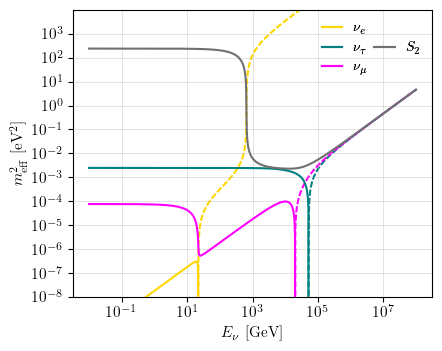

In [156]:
energies, data = read_data("propagation/4_eigenvalues.txt")

names = [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$', r'$S_2$',r'$-\nu_e$', r'$-\nu_\mu$', r'$-\nu_\tau$']

fig1, ax1 = std_fig()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax1.plot(energies/GeV, data[:, 0], label= names[0],  color='gold', zorder=3)
ax1.plot(energies/GeV, -data[:, 0], label= names[4],  color='gold', ls=(1,(3,1)), zorder=1)
ax1.plot(energies/GeV, data[:, 2], label= names[2],  color='teal', zorder=2)
ax1.plot(energies/GeV, -data[:, 2], label= names[5],  color='teal', ls=(1,(3,1)), zorder=1)
ax1.plot(energies/GeV, data[:, 1], label= names[1],  color='magenta', zorder=2)
ax1.plot(energies/GeV, -data[:, 1], label= names[6],  color='magenta', ls=(1,(3,1)), zorder=1)

ax1.plot(energies/GeV, data[:, 3], label= names[3],  color=cm.Greys_r(0.2+1/6), zorder=2)

# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax1.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[2], handles[4],  empty_handle,handles[6]], 
                    [labels[0], labels[2], labels[4], "", labels[6]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax1.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$m_{\text{eff}}^2$ [eV$^2$]')
ax1.add_artist(legend)
#ax1.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax1.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1e-8,1e4)
yticks = [10**i for i in range(-8, 4)]
ax1.set_yticks(yticks)

fig1.savefig('plots/4_eigenvalues.pdf')

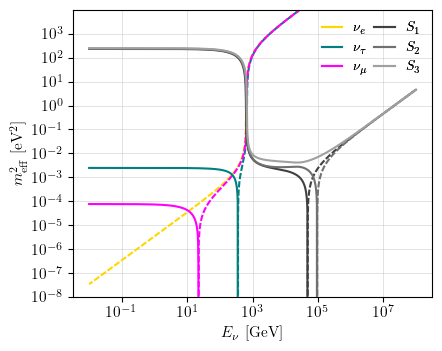

In [157]:
energies, data = read_data("propagation/6_eigenvalues.txt")

names = [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$', r'$S_1$',r'$S_2$', r'$S_3$']

fig1, ax1 = std_fig()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax1.plot(energies/GeV, data[:, 0], label= names[0],  color='gold', zorder=4)
ax1.plot(energies/GeV, -data[:, 0], label= names[0],  color='gold', ls=(1,(3,1)), zorder=2)
ax1.plot(energies/GeV, data[:, 2], label= names[2],  color='teal', zorder=4)
ax1.plot(energies/GeV, -data[:, 2], label= names[2],  color='teal', ls=(1,(3,1)), zorder=2)
ax1.plot(energies/GeV, data[:, 1], label= names[1],  color='magenta', zorder=4)
ax1.plot(energies/GeV, -data[:, 1], label= names[1],  color='magenta', ls=(1,(3,1)), zorder=2)

for i in range(3):  # Loop over other columns as y-values
    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.Greys_r(0.2+i/6), zorder=3)
    ax1.plot(energies/GeV, -data[:, i+3], label= names[i+3],  color=cm.Greys_r(0.2+i/6), ls=(1,(3,1)), zorder=2)

# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax1.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[2], handles[4], handles[6], handles[8], handles[10]], 
                    [labels[0], labels[2], labels[4], labels[6], labels[8], labels[10]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax1.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$m_{\text{eff}}^2$ [eV$^2$]')
ax1.add_artist(legend)
#ax1.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax1.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1e-8,1e4)
yticks = [10**i for i in range(-8, 4)]
ax1.set_yticks(yticks)

fig1.savefig('plots/6_eigenvalues.pdf')

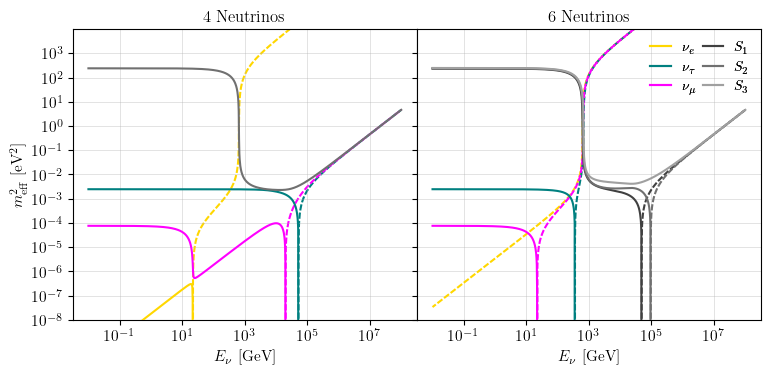

In [158]:
fig = plt.figure(figsize=(1.2 * 3.7*2, 1.6 * 2.3617))  # Adjust the size as needed
gs = gridspec.GridSpec(1, 2, figure=fig)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])

energies, data = read_data("propagation/4_eigenvalues.txt")

names = [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$', r'$S_2$',r'$-\nu_e$', r'$-\nu_\mu$', r'$-\nu_\tau$']

ax00.plot(energies/GeV, data[:, 0], label= names[0],  color='gold', zorder=3)
ax00.plot(energies/GeV, -data[:, 0], label= names[4],  color='gold', ls=(1,(3,1)), zorder=1)
ax00.plot(energies/GeV, data[:, 2], label= names[2],  color='teal', zorder=2)
ax00.plot(energies/GeV, -data[:, 2], label= names[5],  color='teal', ls=(1,(3,1)), zorder=1)
ax00.plot(energies/GeV, data[:, 1], label= names[1],  color='magenta', zorder=2)
ax00.plot(energies/GeV, -data[:, 1], label= names[6],  color='magenta', ls=(1,(3,1)), zorder=1)

ax00.plot(energies/GeV, data[:, 3], label= names[3],  color=cm.Greys_r(0.2+1/6), zorder=2)


handles, labels = ax00.get_legend_handles_labels()
ax00.set_title(r'4 Neutrinos', fontsize=12)
ax00.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax00.set_ylabel(r'$m_{\text{eff}}^2$ [eV$^2$]')
#ax00.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax00.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax00.set_yscale('log')
ax00.set_xscale('log')
ax00.set_ylim(1e-8,1e4)
yticks = [10**i for i in range(-8, 4)]
ax00.set_yticks(yticks)



energies, data = read_data("propagation/6_eigenvalues.txt")

names = [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$', r'$S_1$',r'$S_2$', r'$S_3$']
#for i in [0,2]:  # Loop over other columns as y-values
#    ax01.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax01.plot(energies/GeV, data[:, 0], label= names[0],  color='gold', zorder=4)
ax01.plot(energies/GeV, -data[:, 0], label= names[0],  color='gold', ls=(1,(3,1)), zorder=2)
ax01.plot(energies/GeV, data[:, 2], label= names[2],  color='teal', zorder=4)
ax01.plot(energies/GeV, -data[:, 2], label= names[2],  color='teal', ls=(1,(3,1)), zorder=2)
ax01.plot(energies/GeV, data[:, 1], label= names[1],  color='magenta', zorder=4)
ax01.plot(energies/GeV, -data[:, 1], label= names[1],  color='magenta', ls=(1,(3,1)), zorder=2)

for i in range(3):  # Loop over other columns as y-values
    ax01.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.Greys_r(0.2+i/6), zorder=3)
    ax01.plot(energies/GeV, -data[:, i+3], label= names[i+3],  color=cm.Greys_r(0.2+i/6), ls=(1,(3,1)), zorder=2)


handles, labels = ax01.get_legend_handles_labels()
# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[2], handles[4], handles[6], handles[8], handles[10]], 
                    [labels[0], labels[2], labels[4], labels[6], labels[8], labels[10]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax01.set_title(r'6 Neutrinos', fontsize=12)
ax01.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax01.add_artist(legend)
#ax01.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax01.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax01.set_yscale('log')
ax01.set_xscale('log')
ax01.set_ylim(1e-8,1e4)
yticks = [10**i for i in range(-8, 4)]
ax01.set_yticks(yticks)



plt.subplots_adjust(wspace=0, hspace=0)
ax01.set_yticklabels([])



fig.savefig('plots/1by2_eigenvalues.pdf')


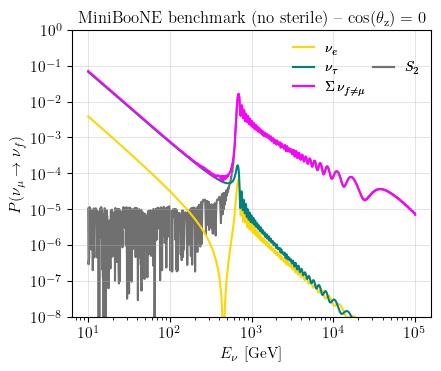

In [159]:
energies, data = read_data("propagation/4_atmos_0.txt")

names = [r'$S_2$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

fig1, ax1 = std_fig()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax1.plot(energies/GeV, data[:, 1], label= names[1],  color='gold', zorder=2)
ax1.plot(energies/GeV, data[:, 3], label= names[3],  color='teal', zorder=2)
ax1.plot(energies/GeV, 1 - data[:, 2], label= names[2],  color='magenta', zorder=2)

ax1.plot(energies/GeV, data[:, 0], label= names[0],  color=cm.Greys_r(0.2+1/6), zorder=1)

# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax1.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[1], handles[2], empty_handle,handles[3]], 
                    [labels[0], labels[1], labels[2], '', labels[3]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax1.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$P(\nu_\mu \to \nu_f)$')
ax1.set_title(r'MiniBooNE benchmark (no sterile) -- $\cos(\theta_{\rm z}) = 0$', fontsize=12)
ax1.add_artist(legend)
#ax1.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax1.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1e-8,0.03)
yticks = [10**i for i in range(-8, 1)]
ax1.set_yticks(yticks)

fig1.savefig('plots/example_1_osc_prob.pdf')

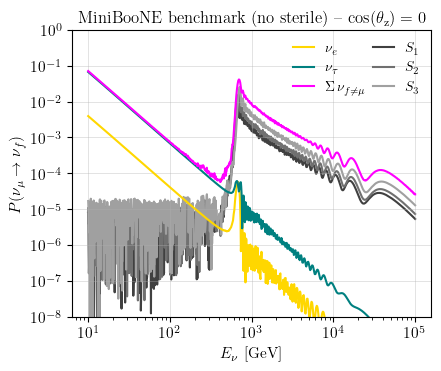

In [160]:
energies, data = read_data("propagation/6_atmos.txt")

names = [r'$S_1$', r'$S_2$', r'$S_3$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

fig2, ax2 = std_fig()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax2.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax2.plot(energies/GeV, data[:, 3], label= names[3],  color='gold', zorder=2)
ax2.plot(energies/GeV, data[:, 5], label= names[5],  color='teal', zorder=2)
ax2.plot(energies/GeV, 1 - data[:, 4], label= names[4],  color='magenta', zorder=2)


for i in range(3):  # Loop over other columns as y-values
    ax2.plot(energies/GeV, data[:, i], label= names[i],  color=cm.Greys_r(0.2+i/6), zorder=1)


ax2.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax2.set_ylabel(r'$P(\nu_\mu \to \nu_f)$')
ax2.set_title(r'MiniBooNE benchmark (no sterile) -- $\cos(\theta_{\rm z}) = 0$', fontsize=12)
ax2.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax2.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(1e-8,0.03)
yticks = [10**i for i in range(-8, 1)]
ax2.set_yticks(yticks)

fig2.savefig('plots/example_2_osc_prob.pdf')

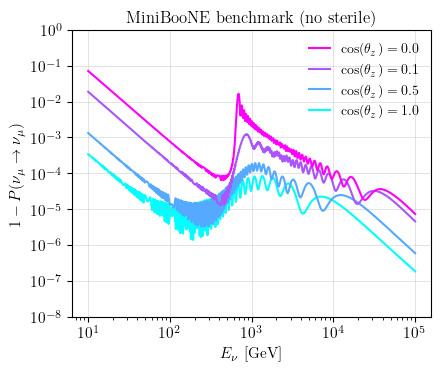

In [161]:
e1, d1 = read_data("propagation/4_atmos_0.txt")
e2, d2 = read_data("propagation/4_atmos_0.1.txt")
e3, d3 = read_data("propagation/4_atmos_0.5.txt")
e4, d4 = read_data("propagation/4_atmos_1.txt")

fig3, ax3 = std_fig()

ax3.plot(e1/GeV, (d1[:, 0]+d1[:, 1]+d1[:, 3]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax3.plot(e2/GeV, (d2[:, 0]+d2[:, 1]+d2[:, 3]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax3.plot(e3/GeV, (d3[:, 0]+d3[:, 1]+d3[:, 3]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax3.plot(e4/GeV, (d4[:, 0]+d4[:, 1]+d4[:, 3]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(1e-8,0.03)
ax3.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax3.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax3.set_title(r'MiniBooNE benchmark (no sterile)', fontsize=12)
ax3.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax3.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
yticks = [10**i for i in range(-8, 1)]
ax3.set_yticks(yticks)

fig3.savefig('plots/example_3_osc_prob.pdf')

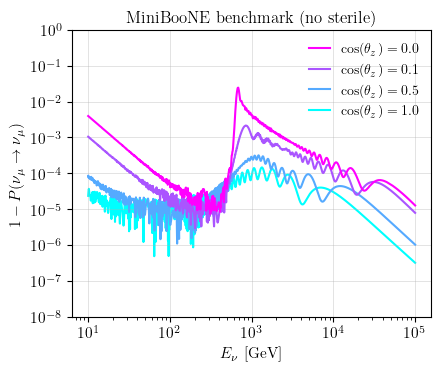

In [162]:
e1, d1 = read_data("propagation/6_atmos.txt")
e2, d2 = read_data("propagation/6_atmos_0.1.txt")
e3, d3 = read_data("propagation/6_atmos_0.5.txt")
e4, d4 = read_data("propagation/6_atmos_1.txt")

fig4, ax4 = std_fig()

ax4.plot(e1/GeV, (d1[:, 0]+d1[:, 1]+d1[:, 3]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax4.plot(e2/GeV, (d2[:, 0]+d2[:, 1]+d2[:, 3]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax4.plot(e3/GeV, (d3[:, 0]+d3[:, 1]+d3[:, 3]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax4.plot(e4/GeV, (d4[:, 0]+d4[:, 1]+d4[:, 3]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.set_ylim(1e-8,0.03)
ax4.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax4.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax4.set_title(r'MiniBooNE benchmark (no sterile)', fontsize=12)
ax4.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax4.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
yticks = [10**i for i in range(-8, 1)]
ax4.set_yticks(yticks)

fig4.savefig('plots/example_4_osc_prob.pdf')

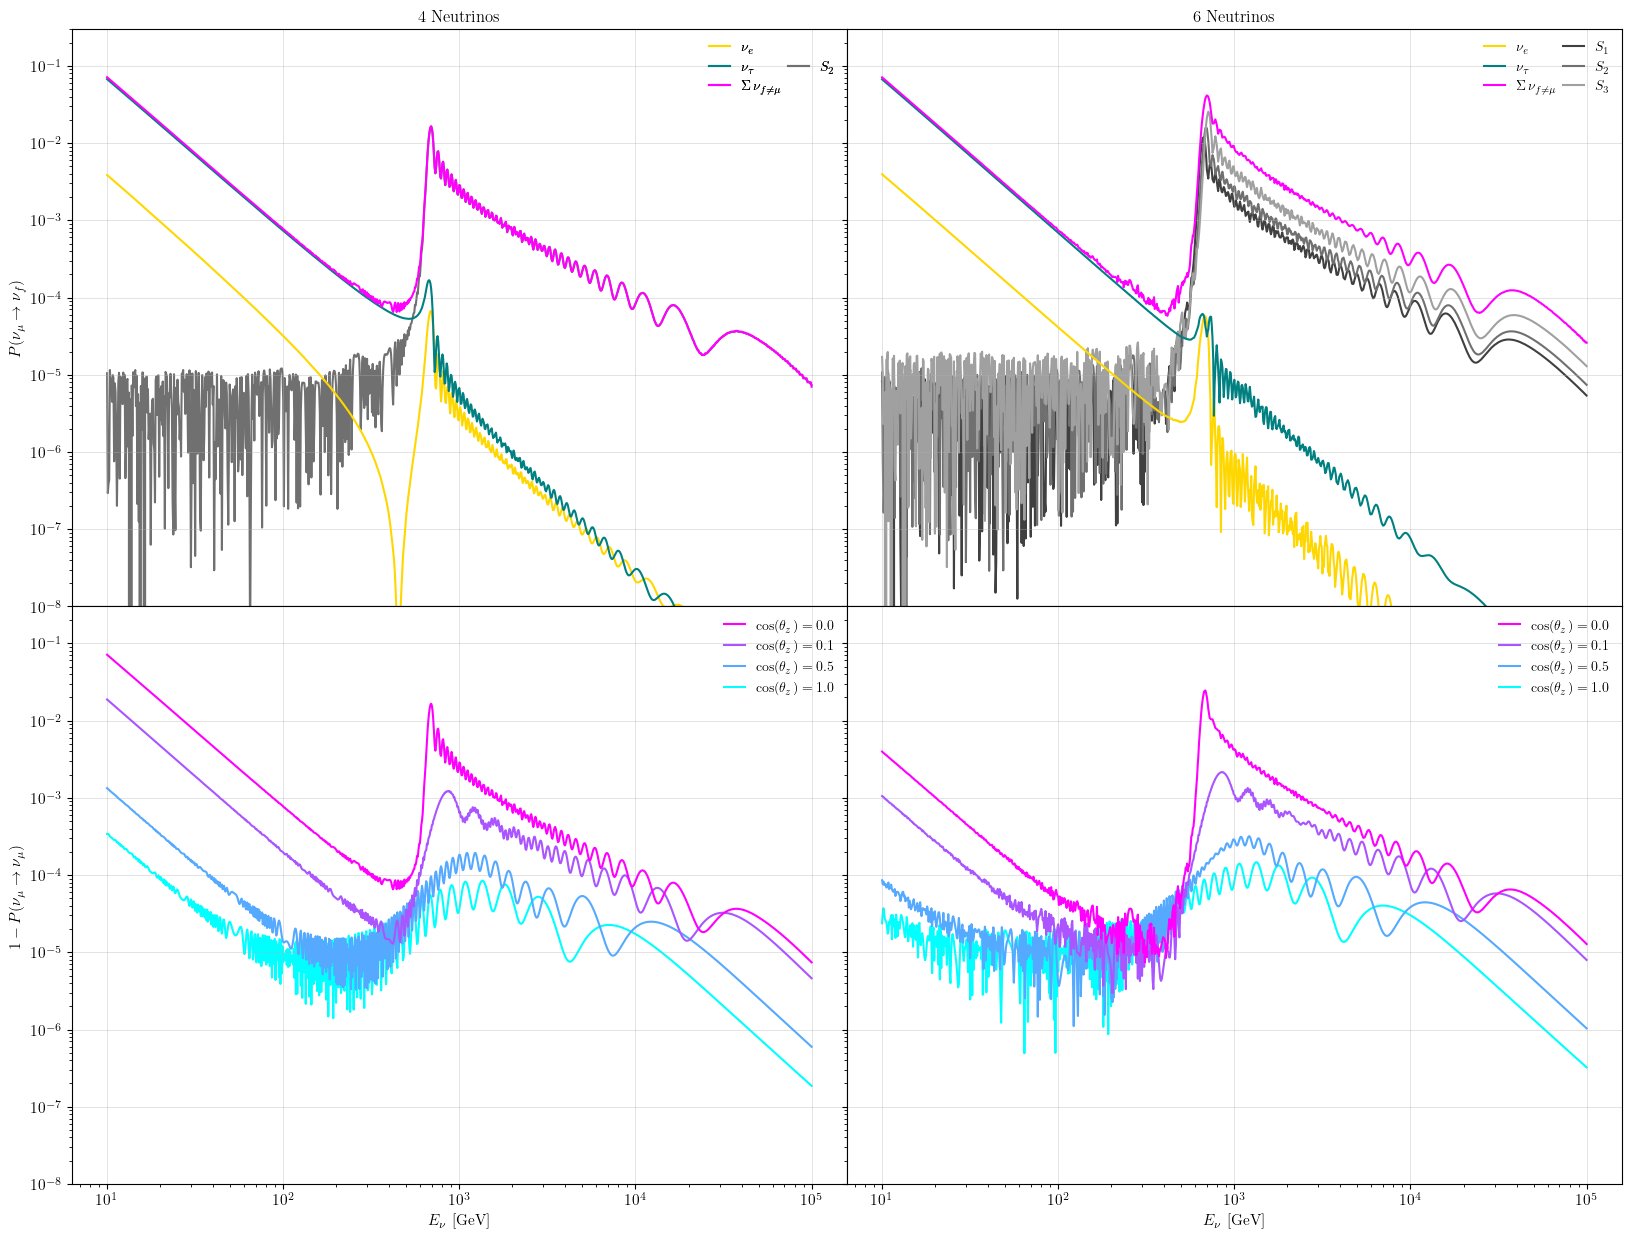

In [207]:
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed
gs = gridspec.GridSpec(2, 2, figure=fig)

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax10 = fig.add_subplot(gs[1, 0])
ax11 = fig.add_subplot(gs[1, 1])

energies, data = read_data("propagation/4_atmos_0.txt")

names = [r'$S_2$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

#for i in [0,2]:  # Loop over other columns as y-values
#    ax.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax00.plot(energies/GeV, data[:, 1], label= names[1],  color='gold', zorder=2)
ax00.plot(energies/GeV, data[:, 3], label= names[3],  color='teal', zorder=2)
ax00.plot(energies/GeV, 1 - data[:, 2], label= names[2],  color='magenta', zorder=2)

ax00.plot(energies/GeV, data[:, 0], label= names[0],  color=cm.Greys_r(0.2+1/6), zorder=1)

# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax00.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = ax00.legend([handles[0], handles[1], handles[2], empty_handle,handles[3]], 
                    [labels[0], labels[1], labels[2], '', labels[3]],
                    frameon=False, loc='upper right', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax00.set_ylabel(r'$P(\nu_\mu \to \nu_f)$')
ax00.set_title(r'4 Neutrinos', fontsize=12)
ax00.add_artist(legend)
#ax00.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax00.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax00.set_yscale('log')
ax00.set_xscale('log')
ax00.set_ylim(1e-8,0.3)



energies, data = read_data("propagation/6_atmos.txt")

names = [r'$S_1$', r'$S_2$', r'$S_3$', r'$\nu_e$', r'$\Sigma \, {\nu_{f \neq \mu }}$', r'$\nu_\tau$']

#for i in [0,2]:  # Loop over other columns as y-values
#    ax.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax01.plot(energies/GeV, data[:, 3], label= names[3],  color='gold', zorder=2)
ax01.plot(energies/GeV, data[:, 5], label= names[5],  color='teal', zorder=2)
ax01.plot(energies/GeV, 1 - data[:, 4], label= names[4],  color='magenta', zorder=2)


for i in range(3):  # Loop over other columns as y-values
    ax01.plot(energies/GeV, data[:, i], label= names[i],  color=cm.Greys_r(0.2+i/6), zorder=1)


ax01.set_title(r'6 Neutrinos', fontsize=12)
ax01.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax01.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)

ax01.set_yscale('log')
ax01.set_xscale('log')
ax01.set_ylim(1e-8,0.3)




e1, d1 = read_data("propagation/4_atmos_0.txt")
e2, d2 = read_data("propagation/4_atmos_0.1.txt")
e3, d3 = read_data("propagation/4_atmos_0.5.txt")
e4, d4 = read_data("propagation/4_atmos_1.txt")

ax10.plot(e1/GeV, (d1[:, 0]+d1[:, 1]+d1[:, 3]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax10.plot(e2/GeV, (d2[:, 0]+d2[:, 1]+d2[:, 3]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax10.plot(e3/GeV, (d3[:, 0]+d3[:, 1]+d3[:, 3]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax10.plot(e4/GeV, (d4[:, 0]+d4[:, 1]+d4[:, 3]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax10.set_yscale('log')
ax10.set_xscale('log')
ax10.set_ylim(1e-8,0.3)
ax10.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax10.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax10.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax10.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)


e1, d1 = read_data("propagation/6_atmos.txt")
e2, d2 = read_data("propagation/6_atmos_0.1.txt")
e3, d3 = read_data("propagation/6_atmos_0.5.txt")
e4, d4 = read_data("propagation/6_atmos_1.txt")

ax11.plot(e1/GeV, (d1[:, 0]+d1[:, 1]+d1[:, 3]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax11.plot(e2/GeV, (d2[:, 0]+d2[:, 1]+d2[:, 3]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax11.plot(e3/GeV, (d3[:, 0]+d3[:, 1]+d3[:, 3]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax11.plot(e4/GeV, (d4[:, 0]+d4[:, 1]+d4[:, 3]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


ax11.set_yscale('log')
ax11.set_xscale('log')
ax11.set_ylim(1e-8,0.3)
ax11.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax11.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax11.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)



plt.subplots_adjust(wspace=0, hspace=0)
ax01.set_yticklabels([])
ax11.set_yticklabels([])
ax00.set_xticklabels([])
ax01.set_xticklabels([])


fig.savefig('plots/2by2_osc_prob.pdf')


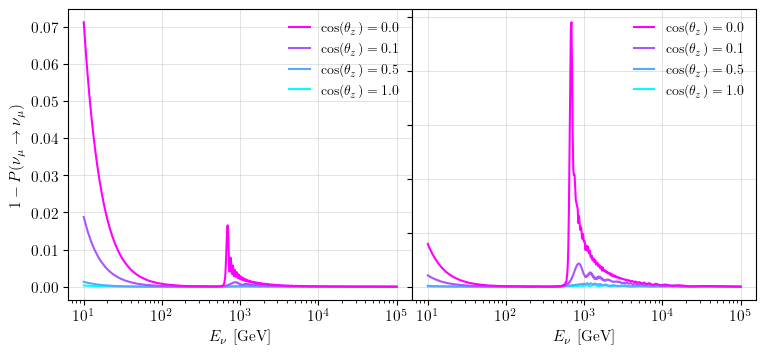

In [203]:
fig = plt.figure(figsize=(1.2 * 3.7*2, 1.6 * 2.3617))  # Adjust the size as needed
gs = gridspec.GridSpec(1, 2, figure=fig)


ax10 = fig.add_subplot(gs[0, 0])
ax11 = fig.add_subplot(gs[0, 1])

e1, d1 = read_data("propagation/4_atmos_0.txt")
e2, d2 = read_data("propagation/4_atmos_0.1.txt")
e3, d3 = read_data("propagation/4_atmos_0.5.txt")
e4, d4 = read_data("propagation/4_atmos_1.txt")

ax10.plot(e1/GeV, (d1[:, 0]+d1[:, 1]+d1[:, 3]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax10.plot(e2/GeV, (d2[:, 0]+d2[:, 1]+d2[:, 3]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax10.plot(e3/GeV, (d3[:, 0]+d3[:, 1]+d3[:, 3]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax10.plot(e4/GeV, (d4[:, 0]+d4[:, 1]+d4[:, 3]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


#ax10.set_yscale('log')
ax10.set_xscale('log')
#ax10.set_ylim(1e-8,0.3)
ax10.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax10.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax10.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax10.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)


e1, d1 = read_data("propagation/6_atmos.txt")
e2, d2 = read_data("propagation/6_atmos_0.1.txt")
e3, d3 = read_data("propagation/6_atmos_0.5.txt")
e4, d4 = read_data("propagation/6_atmos_1.txt")

ax11.plot(e1/GeV, (d1[:, 0]+d1[:, 1]+d1[:, 3]), label= r'$\cos(\theta_z) = 0.0$',  color=cm.cool(3/3), zorder=4)
ax11.plot(e2/GeV, (d2[:, 0]+d2[:, 1]+d2[:, 3]), label= r'$\cos(\theta_z) = 0.1$',  color=cm.cool(2/3), zorder=3)
ax11.plot(e3/GeV, (d3[:, 0]+d3[:, 1]+d3[:, 3]), label= r'$\cos(\theta_z) = 0.5$',  color=cm.cool(1/3), zorder=2)
ax11.plot(e4/GeV, (d4[:, 0]+d4[:, 1]+d4[:, 3]), label= r'$\cos(\theta_z) = 1.0$',  color=cm.cool(0/3), zorder=1)


#ax11.set_yscale('log')
ax11.set_xscale('log')
#ax11.set_ylim(1e-8,0.3)
ax11.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (eV)
ax11.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
ax11.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)



plt.subplots_adjust(wspace=0, hspace=0)
ax01.set_yticklabels([])
ax11.set_yticklabels([])
ax00.set_xticklabels([])
ax01.set_xticklabels([])


fig.savefig('plots/1by2_osc_prob.pdf')

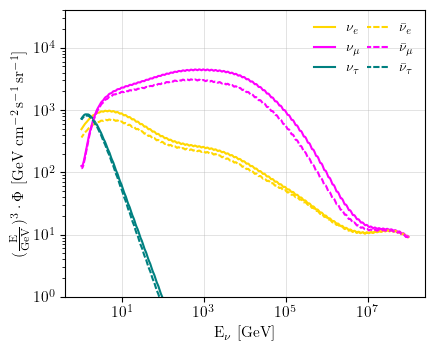

In [165]:
cosine, energies, data = read_cos_energy_data(1, "propagation/3_flav_production.txt")

names = [ r'$\nu_e$', r'$\bar{\nu}_e$', r'$\nu_\mu$', r'$\bar{\nu}_\mu$', r'$\nu_\tau$', r'$\bar{\nu}_\tau$',]

fig1, ax1 = std_fig()
#for i in [0,2]:  # Loop over other columns as y-valuesu
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax1.plot(energies/GeV, data[:, 0]*(energies/GeV)**3, label= names[0],  color='gold', zorder=2)
ax1.plot(energies/GeV, data[:, 1]*(energies/GeV)**3, label= names[2],  color='magenta', zorder=2)
ax1.plot(energies/GeV, data[:, 2]*(energies/GeV)**3, label= names[4],  color='teal' ,zorder=2)
ax1.plot(energies/GeV, data[:, 3]*(energies/GeV)**3, label= names[1],  color='gold', ls=(1,(3,1)),zorder=2)
ax1.plot(energies/GeV, data[:, 4]*(energies/GeV)**3, label= names[3],  color='magenta', ls=(1,(3,1)),zorder=2)
ax1.plot(energies/GeV, data[:, 5]*(energies/GeV)**3, label= names[5],  color='teal', ls=(1,(3,1)),zorder=2)


# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax1.get_legend_handles_labels()


ax1.set_xlabel(r'E$_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$(\frac{\text{E}}{\text{GeV}})^3 \cdot \Phi$ [GeV cm$^{-2}\,$s$^{-1}\,$sr$^{-1}]$')
ax1.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
ax1.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1,)
#yticks = [10**i for i in range(-8, 1)]
#ax1.set_yticks(yticks)


fig1.savefig('plots/3_nurho_nu_surface_flux.pdf')

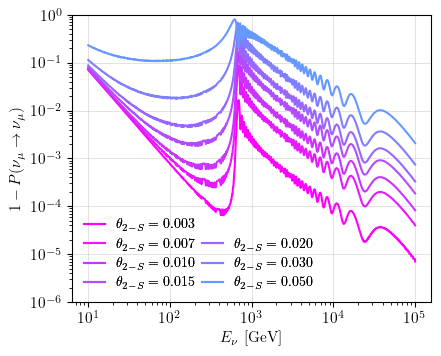

In [166]:
e003, d003 = read_data("propagation/data/alternate_mixing/th_0.003.txt")
e007, d007 = read_data("propagation/data/alternate_mixing/th_0.007.txt")
e010, d010 = read_data("propagation/data/alternate_mixing/th_0.010.txt")
e015, d015 = read_data("propagation/data/alternate_mixing/th_0.015.txt")
e020, d020 = read_data("propagation/data/alternate_mixing/th_0.020.txt")
e030, d030 = read_data("propagation/data/alternate_mixing/th_0.030.txt")
e050, d050 = read_data("propagation/data/alternate_mixing/th_0.050.txt")

names = [r'$\theta_{2-S} = 0.003$', r'$\theta_{2-S} = 0.007$',r'$\theta_{2-S} = 0.010$',r'$\theta_{2-S} = 0.015$',r'$\theta_{2-S} = 0.020$',r'$\theta_{2-S} = 0.030$',r'$\theta_{2-S} = 0.050$']
data = [d003,d007,d010,d015,d020,d030,d050]

fig1, ax1 = std_fig()
for i in range(len(data)):  # Loop over other columns as y-values
    ax1.plot(e050/GeV, 1 - (data[i][:, 2]), label= names[i],  color=cm.cool(1-i/10), zorder=2)
    


# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax1.get_legend_handles_labels()

# Create custom legend
# First three labels in the first column, fourth label in the second column
legend = plt.legend([handles[0], handles[1], handles[2], handles[3], empty_handle, handles[4], handles[5], handles[6]], 
                    [labels[0], labels[1], labels[2],labels[3], '', labels[4], labels[5],labels[6]],
                    frameon=False, loc='lower left', ncol=2, 
                    handlelength=1.5, columnspacing=0.5)

ax1.set_xlabel(r'$E_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$1 - P(\nu_\mu \to \nu_\mu)$')
ax1.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
ax1.add_artist(legend)
#ax1.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1e-6,1e0)
yticks = [10**i for i in range(-6, 1)]
ax1.set_yticks(yticks)

fig1.savefig('plots/mixing_variation_4.pdf')

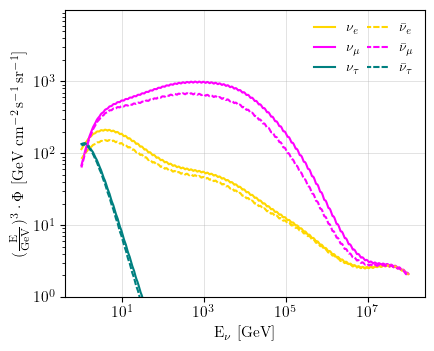

In [167]:
# Initialize an empty list to store data
all_data = []

# Loop over coszen indices and read data
for index in range(50):
    _, energies, data_for_index = read_cos_energy_data(index, "propagation/3_flav_production.txt")
    all_data.append(data_for_index)

# Convert the list of data arrays into a single 2D numpy array
data = np.array(all_data)

# Compute the average over all coszen indices for each energy level
averaged_data = np.mean(data, axis=0)

names = [ r'$\nu_e$', r'$\bar{\nu}_e$', r'$\nu_\mu$', r'$\bar{\nu}_\mu$', r'$\nu_\tau$', r'$\bar{\nu}_\tau$',]

fig1, ax1 = std_fig()
#for i in [0,2]:  # Loop over other columns as y-valuesu
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
ax1.plot(energies/GeV, averaged_data[:, 0]*(energies/GeV)**3, label= names[0],  color='gold', zorder=2)
ax1.plot(energies/GeV, averaged_data[:, 1]*(energies/GeV)**3, label= names[2],  color='magenta', zorder=2)
ax1.plot(energies/GeV, averaged_data[:, 2]*(energies/GeV)**3, label= names[4],  color='teal' ,zorder=2)
ax1.plot(energies/GeV, averaged_data[:, 3]*(energies/GeV)**3, label= names[1],  color='gold', ls=(1,(3,1)),zorder=2)
ax1.plot(energies/GeV, averaged_data[:, 4]*(energies/GeV)**3, label= names[3],  color='magenta', ls=(1,(3,1)),zorder=2)
ax1.plot(energies/GeV, averaged_data[:, 5]*(energies/GeV)**3, label= names[5],  color='teal', ls=(1,(3,1)),zorder=2)


# Create a proxy artist for the empty space
empty_handle = mlines.Line2D([], [], color='none')
# Get handles and labels
handles, labels = ax1.get_legend_handles_labels()


ax1.set_xlabel(r'E$_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$(\frac{\text{E}}{\text{GeV}})^3 \cdot \Phi$ [GeV cm$^{-2}\,$s$^{-1}\,$sr$^{-1}]$')
ax1.grid(which='major', linewidth=0.5,zorder=-1, alpha=0.5)
ax1.legend(frameon=False, loc='upper right', ncol=2, handlelength=1.5, columnspacing=0.5)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1,)
#yticks = [10**i for i in range(-8, 1)]
#ax1.set_yticks(yticks)


fig1.savefig('plots/3_averaged_surface_flux.pdf')

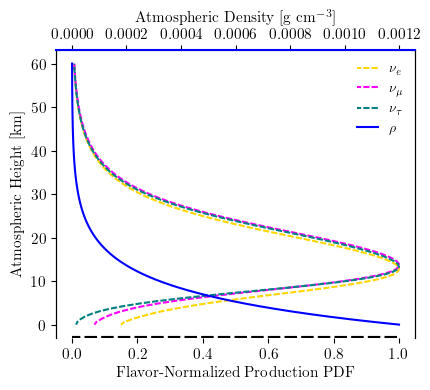

In [201]:
data = np.loadtxt("data/nuProd_January.txt", delimiter=' ')

# Separate the columns into individual arrays
heights = data[:, 0]  # Heights
energies = data[:, 1]  # Energies
nueprod = data[:, 2]  # Differential flux
numuprod = data[:, 3]  # Differential flux
nutauprod = data[:, 4]  # Differential flux
total_flux = [np.sum(nueprod), np.sum(numuprod), np.sum(nutauprod)]

# Sums corresponding to each unique height value
unique_heights = np.unique(heights)
height_sums = [np.array([np.sum(nueprod[heights == h]) for h in unique_heights]), 
                   np.array([np.sum(numuprod[heights == h]) for h in unique_heights]), 
                   np.array([np.sum(nutauprod[heights == h]) for h in unique_heights])]
densities = 0.0012*np.exp(-(unique_heights)/(7.594))
# Calculate the ratios of the h_i sums over the total
ratios = [a/b for a, b in zip(height_sums, total_flux)]


names = [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$']
colors = ['gold', 'magenta', 'teal']
fig1, ax1 = std_fig()
ax2 = ax1.twiny()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
for i in range(len(ratios)):
    ax1.plot(ratios[i]/max(ratios[i]), unique_heights, color=colors[i], label = names[i],ls=(1,(3,1)), zorder=i)
ax2.plot(densities, unique_heights, color='b', zorder=2)
#
ax1.plot(np.nan, color='b', label = r'$\rho$')
ax1.set_xlabel(r'Flavor-Normalized Production PDF')
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_color('b')
ax2.spines['top'].set_linewidth(1.5)
y_pos = ax1.spines['bottom'].get_position()[1]

# Draw a new line where the bottom spine was, with the desired style
from matplotlib.lines import Line2D
ax1.add_line(Line2D([0, 1], [y_pos, y_pos], transform=ax1.get_xaxis_transform(), linestyle=(1,(3,1)), linewidth=3, color='black'))
ax1.set_ylabel(r'Atmospheric Height [km]')
ax2.set_xlabel(r'Atmospheric Density [g cm$^{-3}$]')
ax1.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
fig1.savefig('plots/norm_prof_PDF.pdf')

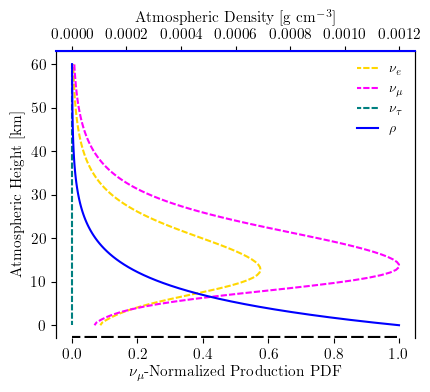

In [199]:
data = np.loadtxt("data/nuProd_January.txt", delimiter=' ')

# Separate the columns into individual arrays
heights = data[:, 0]  # Heights
energies = data[:, 1]  # Energies
nueprod = data[:, 2]  # Differential flux
numuprod = data[:, 3]  # Differential flux
nutauprod = data[:, 4]  # Differential flux
total_flux = [np.sum(nueprod), np.sum(numuprod), np.sum(nutauprod)]

# Sums corresponding to each unique height value
unique_heights = np.unique(heights)
height_sums = [np.array([np.sum(nueprod[heights == h]) for h in unique_heights]), 
                   np.array([np.sum(numuprod[heights == h]) for h in unique_heights]), 
                   np.array([np.sum(nutauprod[heights == h]) for h in unique_heights])]
densities = 0.0012*np.exp(-(unique_heights)/(7.594))
# Calculate the ratios of the h_i sums over the total
ratios = [a/total_flux[1] for a, b in zip(height_sums, total_flux)]


names = [r'$\nu_e$', r'$\nu_\mu$', r'$\nu_\tau$']
colors = ['gold', 'magenta', 'teal']
fig1, ax1 = std_fig()
ax2 = ax1.twiny()
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)
for i in range(len(ratios)):
    ax1.plot(ratios[i]/max(ratios[1]), unique_heights, color=colors[i], label = names[i],ls=(1,(3,1)), zorder=i)
ax2.plot(densities, unique_heights, color='b', zorder=2)
#
ax1.plot(np.nan, color='b', label = r'$\rho$')
ax1.set_xlabel(r'$\nu_{\mu}$-Normalized Production PDF')
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_color('b')
ax2.spines['top'].set_linewidth(1.5)
y_pos = ax1.spines['bottom'].get_position()[1]

# Draw a new line where the bottom spine was, with the desired style
from matplotlib.lines import Line2D
ax1.add_line(Line2D([0, 1], [y_pos, y_pos], transform=ax1.get_xaxis_transform(), linestyle=(1,(3,1)), linewidth=3, color='black'))
ax1.set_ylabel(r'Atmospheric Height [km]')
ax2.set_xlabel(r'Atmospheric Density [g cm$^{-3}$]')
ax1.legend(frameon=False, loc='upper right', ncol=1, handlelength=1.5, columnspacing=0.5)
fig1.savefig('plots/numu_norm_prof_PDF.pdf')

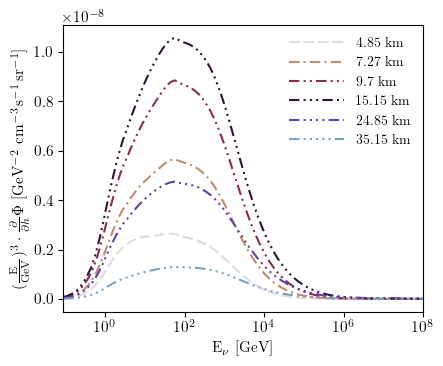

In [169]:
# Load your data
data = np.loadtxt("data/nuProd_January.txt", delimiter=' ')  # Assuming your file is named 'data.txt'

# Separate the columns into individual arrays
heights = data[:, 0]  # Heights
energies = data[:, 1]  # Energies
flux = data[:, 3]  # Flux

# Define the target heights
target_heights = [5,7.5, 10, 15,25,35]

# Find the indices of the heights closest to the target heights
closest_heights_indices = [np.abs(heights - target_height).argmin() for target_height in target_heights]

# Extract the rows for the closest heights
closest_data = data[closest_heights_indices]

# Plot flux vs energy for each of the closest heights
fig1, ax1 = std_fig()

for i in range(len(closest_data)):
    # Extract the energy and flux for the current height
    current_height = closest_data[i][0]
    mask = heights == current_height
    current_energies = energies[mask]
    current_flux = flux[mask]
    # Plot the line
    line, = ax1.plot(current_energies, current_flux*current_energies**3, 
             color=cm.twilight(1-(i)/(len(closest_data))) ,label=f'~ {round(current_height,2)} km')
    
    pattern = create_dash_dot_pattern(dash_length=5, space_length=2, num_dots=i)
    line.set_dashes(pattern)
#
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)


ax1.set_xlabel(r'E$_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$(\frac{\text{E}}{\text{GeV}})^3 \cdot \frac{\partial }{\partial h}\Phi$ [GeV$^{-2}$ cm$^{-3}\,$s$^{-1}\,$sr$^{-1}]$')
ax1.legend(frameon=False, loc='upper right', ncol=1,handlelength=4, columnspacing=0.5)
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.set_xlim(min(current_energies),10**8)
plt.show()
fig1.savefig('plots/linear_production.pdf')

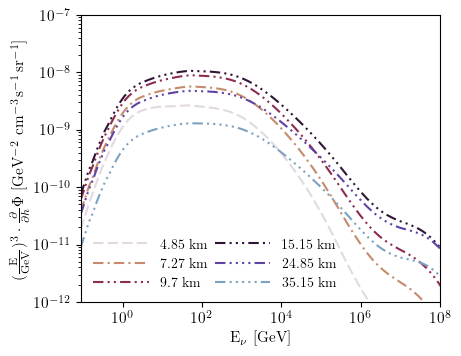

In [170]:
# Load your data
data = np.loadtxt("data/nuProd_January.txt", delimiter=' ')  # Assuming your file is named 'data.txt'

# Separate the columns into individual arrays
heights = data[:, 0]  # Heights
energies = data[:, 1]  # Energies
flux = data[:, 3]  # Flux

# Define the target heights
target_heights = [5,7.5, 10, 15,25,35]

# Find the indices of the heights closest to the target heights
closest_heights_indices = [np.abs(heights - target_height).argmin() for target_height in target_heights]

# Extract the rows for the closest heights
closest_data = data[closest_heights_indices]

# Plot flux vs energy for each of the closest heights
fig1, ax1 = std_fig()

for i in range(len(closest_data)):
    # Extract the energy and flux for the current height
    current_height = closest_data[i][0]
    mask = heights == current_height
    current_energies = energies[mask]
    current_flux = flux[mask]
    # Plot the line
    line, = ax1.plot(current_energies, current_flux*current_energies**3, 
             color=cm.twilight(1-(i)/(len(closest_data))) ,label=f'~ {round(current_height,2)} km')
    
    pattern = create_dash_dot_pattern(dash_length=5, space_length=2, num_dots=i)
    line.set_dashes(pattern)
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)

ax1.set_xlabel(r'E$_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$(\frac{\text{E}}{\text{GeV}})^3 \cdot \frac{\partial }{\partial h}\Phi$ [GeV$^{-2}$ cm$^{-3}\,$s$^{-1}\,$sr$^{-1}]$')
ax1.legend(frameon=False, loc='lower left', ncol=2,handlelength=4, columnspacing=0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(min(current_energies),10**8)
ax1.set_ylim(10**(-12),10**(-7))
fig1.savefig('plots/log_production.pdf')

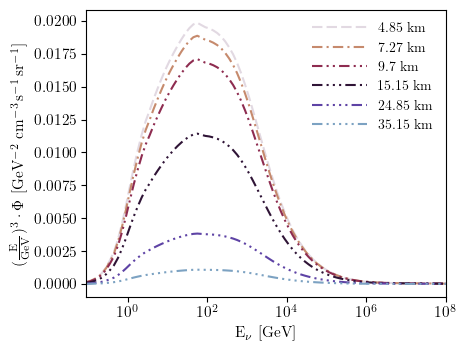

In [171]:
# Load your data
data = np.loadtxt("data/nuFlux_January.txt", delimiter=' ')  # Assuming your file is named 'data.txt'

# Separate the columns into individual arrays
heights = data[:, 0]  # Heights
energies = data[:, 1]  # Energies
flux = data[:, 3]  # Flux

# Define the target heights
target_heights = [5,7.5, 10, 15,25,35]

# Find the indices of the heights closest to the target heights
closest_heights_indices = [np.abs(heights - target_height).argmin() for target_height in target_heights]

# Extract the rows for the closest heights
closest_data = data[closest_heights_indices]

# Plot flux vs energy for each of the closest heights
fig1, ax1 = std_fig()

for i in range(len(closest_data)):
    # Extract the energy and flux for the current height
    current_height = closest_data[i][0]
    mask = heights == current_height
    current_energies = energies[mask]
    current_flux = flux[mask]
    # Plot the line
    line, = ax1.plot(current_energies, current_flux*current_energies**3, color=cm.twilight(1-(i)/(len(closest_data)))  ,label=f'~ {round(current_height,2)} km')

    pattern = create_dash_dot_pattern(dash_length=5, space_length=2, num_dots=i)
    line.set_dashes(pattern)
#for i in [0,2]:  # Loop over other columns as y-values
#    ax1.plot(energies/GeV, data[:, i+3], label= names[i+3],  color=cm.cool((i+.5)/3), zorder=2)

ax1.set_xlabel(r'E$_\nu$ [GeV]')  # Assuming the energy unit is electron volts (GeV)
ax1.set_ylabel(r'$(\frac{\text{E}}{\text{GeV}})^3 \cdot \Phi$ [GeV$^{-2}$ cm$^{-3}\,$s$^{-1}\,$sr$^{-1}]$')
ax1.legend(frameon=False, loc='upper right', ncol=1,handlelength=4, columnspacing=0.5)
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.set_xlim(min(current_energies),10**8)
#ax1.set_ylim(10**(-5),10**(-1))
fig1.savefig('plots/linear_flux.pdf')